In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

In [ ]:
df_sample = pd.read_csv("/content/drive/MyDrive/datapreparing/Final Exam 19 12/dataset/sample.csv")
df_test = pd.read_csv("/content/drive/MyDrive/datapreparing/Final Exam 19 12/dataset/test.csv", sep=";")
df_train = pd.read_csv("/content/drive/MyDrive/datapreparing/Final Exam 19 12/dataset/train.csv", sep=";")

# **Read and Understand data**

In [ ]:
df_sample.head()

,Id,Predicted
0,1,10000
1,2,20000
2,3,30000
3,4,40000
4,5,50000


In [ ]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Id         2128 non-null   int64
 1   Predicted  2128 non-null   int64
dtypes: int64(2)
memory usage: 33.4 KB


In [ ]:
df_test.head()

,Id,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,1,Skoda Rapid 1.6 MPI AT Elegance,2016,11000,Petrol,Dealer,Automatic,First Owner,14.3 kmpl,1598 CC,103.5 bhp,153Nm@ 3800rpm,5.0
1,2,Honda City i VTEC V,2017,35000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1497 CC,117.3 bhp,145Nm@ 4600rpm,5.0
2,3,Hyundai Xcent 1.2 Kappa SX Option,2014,80000,Petrol,Individual,Manual,First Owner,19.1 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
3,4,Mahindra Scorpio 2009-2014 SLE 7S BSIII,2014,145241,Diesel,Individual,Manual,First Owner,12.05 kmpl,2179 CC,120 bhp,290Nm@ 1800-2800rpm,7.0
4,5,Ford Ecosport 1.5 Diesel Titanium,2015,92651,Diesel,Dealer,Manual,First Owner,21.7 kmpl,1498 CC,98.96 bhp,215Nm@ 1750-2500rpm,5.0


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2128 non-null   int64  
 1   name          2128 non-null   object 
 2   year          2128 non-null   int64  
 3   km_driven     2128 non-null   int64  
 4   fuel          2128 non-null   object 
 5   seller_type   2128 non-null   object 
 6   transmission  2128 non-null   object 
 7   owner         2128 non-null   object 
 8   mileage       2066 non-null   object 
 9   engine        2066 non-null   object 
 10  max_power     2067 non-null   object 
 11  torque        2066 non-null   object 
 12  seats         2066 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 216.2+ KB


In [ ]:
df_test.isnull().sum()

Id               0
name             0
year             0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage         62
engine          62
max_power       61
torque          62
seats           62
dtype: int64

* Name: The brand and model of the car.

* Year: The year or edition of the model.

* km_driven: The total kilometres driven in the car by the previous owner(s) in KM.

* fuel: The type of fuel used by the car.

* transmission: The type of transmission used by the car.

* owner: Whether the ownership is Firsthand, Second hand or other.

* mileage: The standard mileage offered by the car company in kmpl or km/kg

* Engine: The displacement volume of the engine in cc.

* max_power: The maximum power of the engine in bhp.

* torque: 

* seats: The number of seats in the car.


In [ ]:
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19 kmpl,1396 CC,88.76 bhp,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55 kmpl,2982 CC,168.5 bhp,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01 kmpl,1591 CC,121.3 bhp,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0 kmpl,1969 CC,190 bhp,400Nm,5.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6000 non-null   object 
 1   year           6000 non-null   int64  
 2   selling_price  6000 non-null   int64  
 3   km_driven      6000 non-null   int64  
 4   fuel           6000 non-null   object 
 5   seller_type    6000 non-null   object 
 6   transmission   6000 non-null   object 
 7   owner          6000 non-null   object 
 8   mileage        5841 non-null   object 
 9   engine         5841 non-null   object 
 10  max_power      5846 non-null   object 
 11  torque         5840 non-null   object 
 12  seats          5841 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 609.5+ KB


In [ ]:
df_train.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          159
engine           159
max_power        154
torque           160
seats            159
dtype: int64

In [ ]:
df_train.describe()

,year,selling_price,km_driven,seats
count,6000.000000,6.000000e+03,6.000000e+03,5841.000000
mean,2013.814833,6.387764e+05,6.997216e+04,5.429550
std,4.026733,8.066632e+05,5.188961e+04,0.977071
min,1983.000000,3.000000e+04,1.000000e+03,2.000000
25%,2011.000000,2.557498e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.900000e+04,5.000000
max,2020.000000,1.000000e+07,1.500000e+06,14.000000


index năm 1983 là 1315

In [ ]:
df_train['Mileage(km/kg)'] = df_train['Mileage(km/kg)'].astype(float)
df_train['Engine(CC)'] = df_train['Engine(CC)'].astype(float)

In [ ]:
for i in range(df_train.shape[0]):
    df_train.at[i, 'Company'] = df_train['name'][i].split()[0]
    df_train.at[i, 'Mileage(km/kg)'] = df_train['mileage'][i].split()[0]
    df_train.at[i, 'Engine(CC)'] = df_train['engine'][i].split()[0]
    df_train.at[i, 'Power(bhp)'] = df_train['max_power'][i].split()[0]

In [ ]:
cat_col = [
    "fuel",
    "transmission",
    "seats",
    "year",
    "owner",
    
]
# Printing number of count of each unique value in each column
for column in cat_col:
    print(df_train[column].value_counts())
    print("#" * 40)

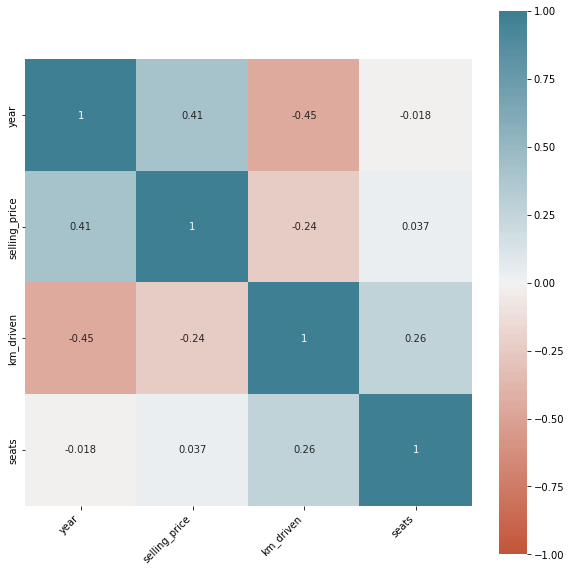

In [ ]:
# correlation
pd.set_option('precision', 2)
cor = df_train.corr(method='pearson')
# select features that have high absolute correlation with output.
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df_train['selling_price'])
plt.xlim([0,160])

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(df_sample['Predicted'])
plt.xlim([0,160])

# **Data Preprocessing**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distributional of price')

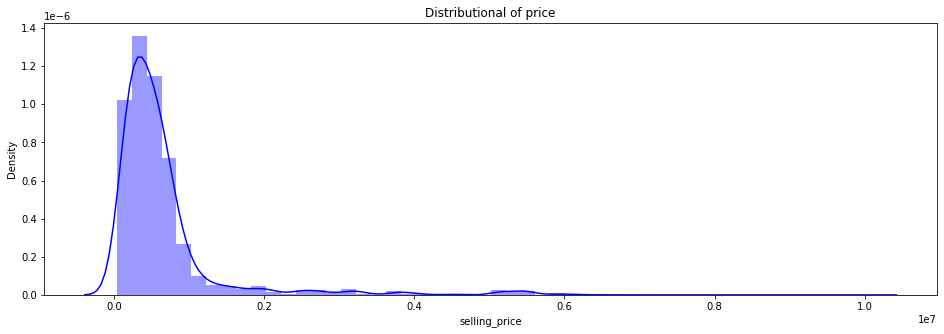

In [ ]:
f, axes = plt.subplots(1,1, figsize = (16, 5))
g1 = sns.distplot(df_train["selling_price"], color="blue",ax = axes)
plt.title("Distributional of price")

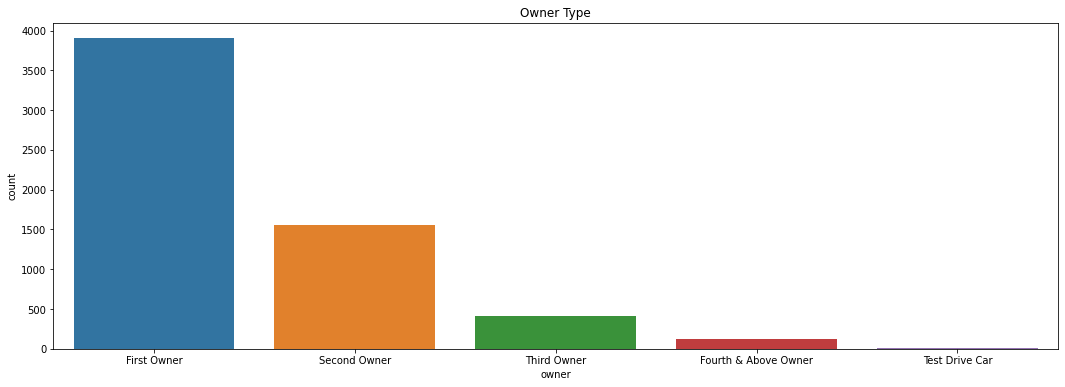

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='owner', data=df_train)
plt.title('Owner Type')
plt.show()

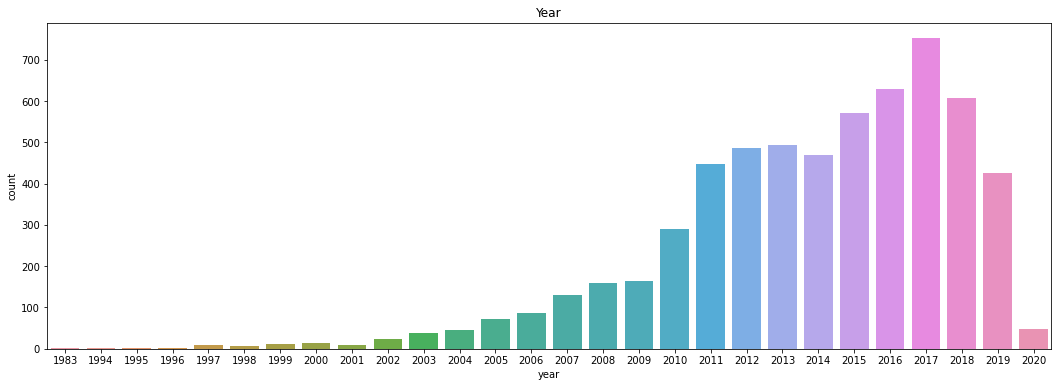

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='year', data=df_train)
plt.title('Year')
plt.show()

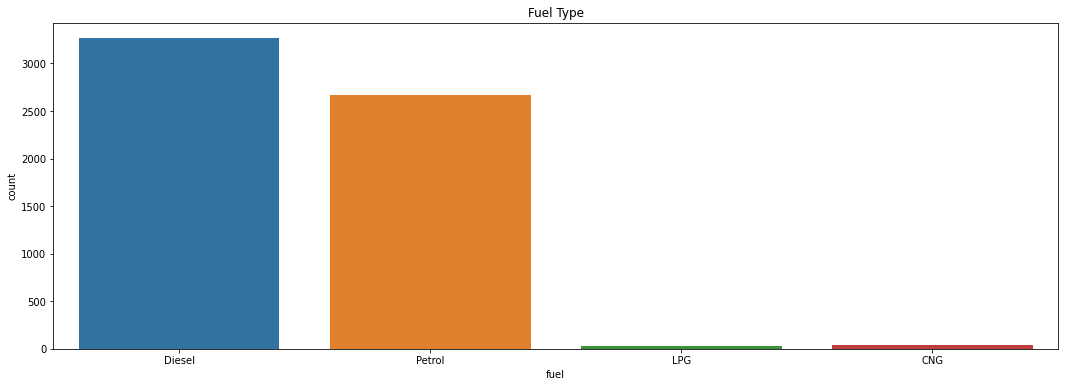

In [ ]:
plt.figure(figsize=(18,6))
sns.countplot(x='fuel', data=df_train)
plt.title('Fuel Type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Transmission: Kilometers_Driven comparsion')

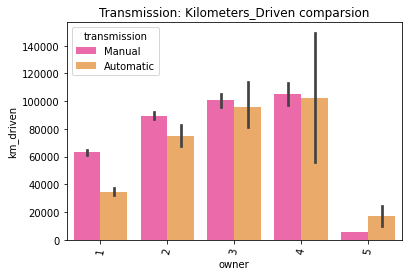

In [ ]:
sns.barplot(df_train["owner"],df_train["km_driven"],hue= df_train["transmission"],palette="spring")
plt.xticks(rotation=80)
plt.title("Transmission: Kilometers_Driven comparsion")

In [ ]:
x = df_train.year
for i in x:
  if i == '1983':
    print(i)
  


In [ ]:
df_train["engine"] = df_train["engine"].str.rstrip(" CC")

In [ ]:
df_train["max_power"] = df_train["max_power"].str.rstrip(" bhp")

In [ ]:
df_train["mileage"] = df_train["mileage"].str.rstrip(" kmpl")
df_train["mileage"] = df_train["mileage"].str.rstrip(" km/kg")


In [ ]:
df_train.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982,168.5,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591,121.3,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0,1969,190,400Nm,5.0
5,Fiat Avventura Power Up 1.3 Emotion,2015,500000,96500,Diesel,Individual,Manual,First Owner,20.5,1248,91.72,209Nm@ 2000rpm,5.0
6,Hyundai i10 Magna 1.2 iTech SE,2013,325000,70000,Petrol,Individual,Manual,First Owner,20.36,1197,78.9,111.7Nm@ 4000rpm,5.0
7,Hyundai EON D Lite Plus,2017,270000,50000,Petrol,Individual,Manual,First Owner,21.1,814,55.2,74.5Nm@ 4000rpm,5.0
8,Mahindra Verito 1.5 D4 BSIII,2011,174000,100000,Diesel,Individual,Manual,Second Owner,21.0,1461,64.1,160Nm@ 2000rpm,5.0
9,Hyundai i10 Magna 1.2 iTech SE,2012,270000,56000,Petrol,Individual,Manual,First Owner,20.36,1197,78.9,111.7Nm@ 4000rpm,5.0


In [ ]:
df_train['engine'] = df_train['engine'].astype(float)
#df_train['max_power'] = df_train['max_power'].astype(float)
df_train['mileage'] = df_train['mileage'].astype(float)



In [ ]:
df_train.transmission.value_counts()

Manual       5228
Automatic     772
Name: transmission, dtype: int64

In [ ]:
df_train.owner.value_counts()

First Owner             3904
Second Owner            1558
Third Owner              414
Fourth & Above Owner     119
Test Drive Car             5
Name: owner, dtype: int64

In [ ]:
x1 = df_train[df_train.mileage.isnull()==True]
x1.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
14,Maruti Swift 1.3 LXI,2005,85000,100000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN
106,Hyundai Santro GS zipPlus,2001,60000,71000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
113,Toyota Etios Liva G,2012,350000,40000,Petrol,Individual,Manual,Third Owner,NaN,NaN,NaN,NaN,NaN
142,Toyota Etios Liva GD,2012,275000,120000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
149,Maruti Zen Estilo VXI BSIV W ABS,2011,200000,40000,Petrol,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
x1.seller_type.value_counts()

Individual    146
Dealer         13
Name: seller_type, dtype: int64

In [ ]:
x1.transmission.value_counts()


Manual       155
Automatic      4
Name: transmission, dtype: int64

In [ ]:
x1.fuel.value_counts()

Petrol    82
Diesel    73
LPG        2
CNG        2
Name: fuel, dtype: int64

In [ ]:
x1.year.value_counts()

2012    24
2005    17
2011    17
2006    14
2010    13
2003    11
2009     9
2008     9
2002     7
2004     7
2017     6
2007     6
2001     3
2000     3
1999     3
2016     2
1997     2
2013     1
2014     1
2015     1
1998     1
1995     1
1983     1
Name: year, dtype: int64

In [ ]:
df_train.query("year == 1983")['year']

1315    1983
Name: year, dtype: int64

In [ ]:
df_train.query("mileage == 0")['mileage']

Series([], Name: mileage, dtype: object)

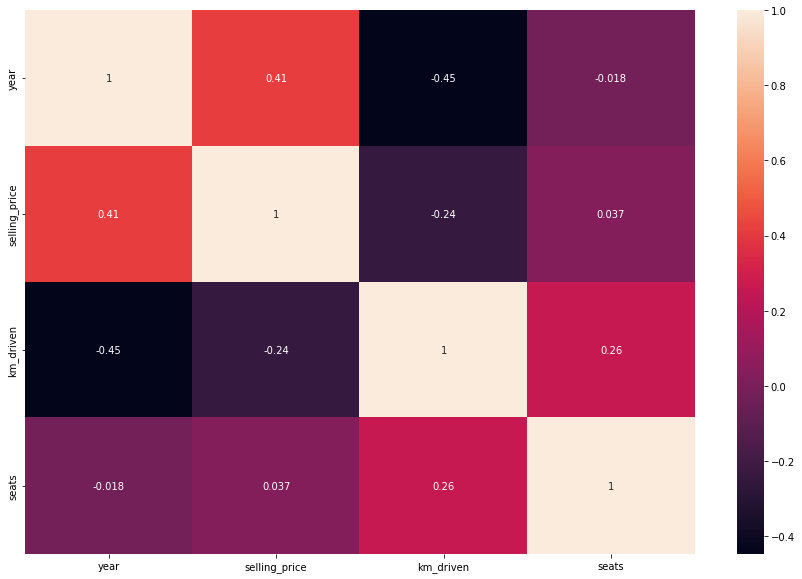

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

In [ ]:
x2 = df_train
x2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5,1497,108.5,260Nm@ 1500-2750rpm,5.0
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner,21.19,1396,88.76,219.66nm@ 1500-2750rpm,5.0
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner,12.55,2982,168.5,360Nm@ 1400-3200rpm,7.0
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner,17.01,1591,121.3,154.9Nm@ 4200rpm,5.0
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner,18.0,1969,190,400Nm,5.0


In [ ]:
x2.drop(["seats"],axis=1,inplace=True)
x2.drop(["mileage"],axis=1,inplace=True)
x2.drop(["engine"],axis=1,inplace=True)
x2.drop(["max_power"],axis=1,inplace=True)
x2.drop(["torque"],axis=1,inplace=True)

In [ ]:
x2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner
1,Hyundai i20 Active SX Diesel,2018,750000,30000,Diesel,Individual,Manual,First Owner
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,Diesel,Individual,Automatic,Second Owner
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,Petrol,Individual,Manual,First Owner
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,Diesel,Individual,Automatic,First Owner


In [ ]:
x2.replace({"First Owner":1,"Second Owner":2,"Third Owner": 3,"Fourth & Above Owner":4, "Test Drive Car":5},inplace=True)
x2.replace({"Manual": 1, "Automatic": 0}, inplace=True)
x2.replace({"Individual": 0, "Dealer": 1, "Trustmark Dealer":2}, inplace=True)
x2.replace({"Diesel":1,"Petrol":2,"LPG": 3,"CNG":4},inplace=True)

x2.head()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,1,0,1,1
1,Hyundai i20 Active SX Diesel,2018,750000,30000,1,0,1,1
2,Toyota Fortuner 4x2 AT,2015,1500000,80000,1,0,0,2
3,Hyundai Verna 1.6 VTVT SX,2015,795000,35000,2,0,1,1
4,Volvo XC40 D4 Inscription BSIV,2019,3800000,20000,1,0,0,1


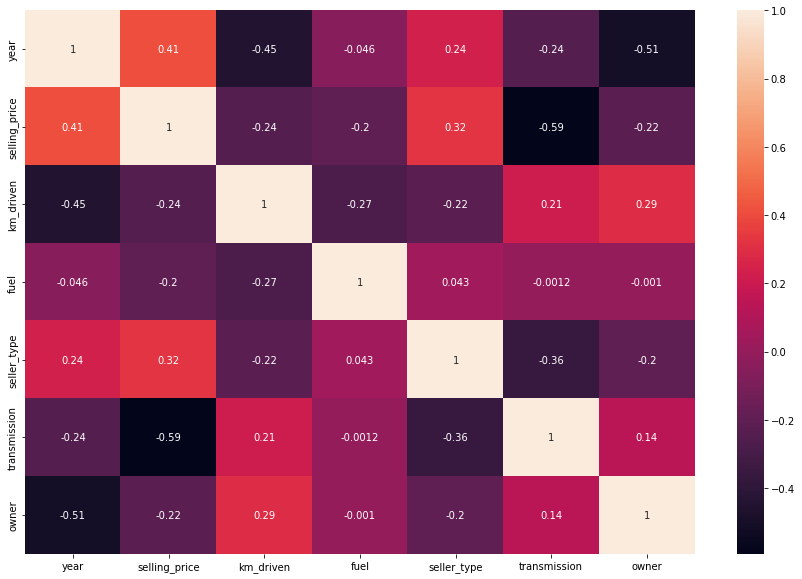

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df_train.corr(),annot=True)

In [ ]:
print(df_train['fuel'].unique())
print(df_train['seller_type'].unique())
print(df_train['transmission'].unique())
print(df_train['owner'].unique())


['Diesel' 'Petrol' 'LPG' 'CNG']
['Individual' 'Dealer' 'Trustmark Dealer']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
